In [0]:
#Lubdha Pimpale
#HW5
#4/7/2019
#4964423675
#lpimpale@usc.edu

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=20,
                                         shuffle=False, num_workers=2)



In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding =2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [0]:
neural_net = Net()

# lr, momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neural_net.parameters(), lr=0.008, momentum=0.9)
#optimizer = optim.Adam(net.parameters())



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

neural_net  = neural_net.to(device)



In [13]:

#epoch
accuracy_train=[]
accuracy_test=[]
for epoch in range(25):  # loop over the dataset multiple times
    total_test=0
    correct_test=0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        

    # accuracy
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = neural_net(images)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        
    accuracy_train.append(correct_test/total_test)
    total_test=0
    correct_test=0


    with torch.no_grad():
        for data in testloader:
            data[0] = 1 - data[0]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = neural_net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    accuracy_test.append(correct_test/total_test)
print('Finished Training')


Finished Training


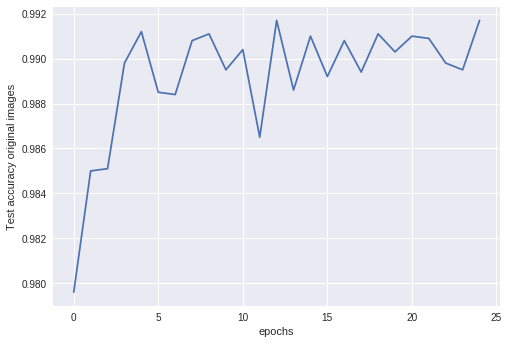

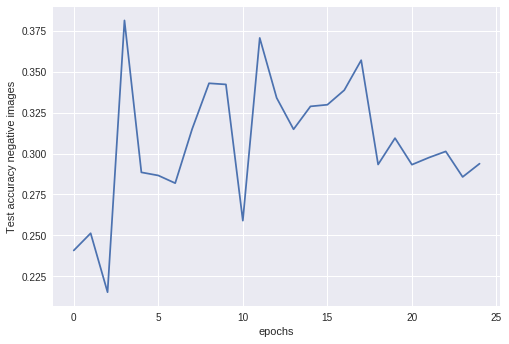

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(25), accuracy_train)
plt.xlabel('epochs')
plt.ylabel('Test accuracy original images')
plt.show()

plt.plot(range(25), accuracy_test)
plt.xlabel('epochs')
plt.ylabel('Test accuracy negative images')
plt.show()

In [15]:
print('train accuracy',accuracy_train[24])
print('test accuracy',accuracy_test[24])

train accuracy 0.9917
test accuracy 0.2938


In [0]:
neural_net = Net()

# lr, momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neural_net.parameters(), lr=0.008, momentum=0.9)
#optimizer = optim.Adam(net.parameters())



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

neural_net  = neural_net.to(device)



In [8]:

#epoch
accuracy_train=[]
accuracy_test=[]
for epoch in range(25):  # loop over the dataset multiple times
    total_test=0
    correct_test=0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        data[0] = 1 - data[0]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # accuracy
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = neural_net(images)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        
    accuracy_train.append(correct_test/total_test)
    total_test=0
    correct_test=0


    with torch.no_grad():
        for data in testloader:
            data[0] = 1 - data[0]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = neural_net(images)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    accuracy_test.append(correct_test/total_test)
print('Finished Training')


Finished Training


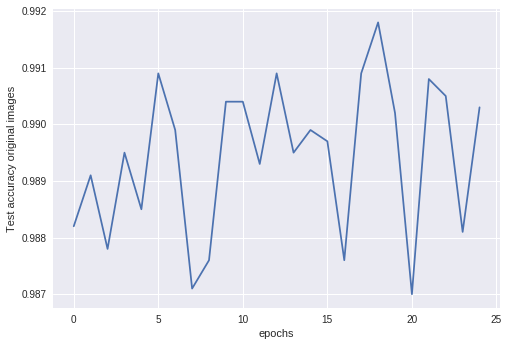

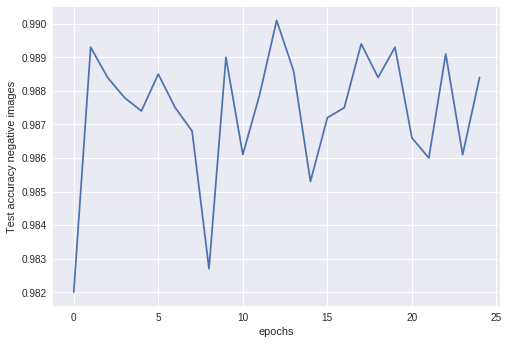

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(25), accuracy_train)
plt.xlabel('epochs')
plt.ylabel('Test accuracy original images')
plt.show()

plt.plot(range(25), accuracy_test)
plt.xlabel('epochs')
plt.ylabel('Test accuracy negative images')
plt.show()

In [0]:
print('train accuracy',accuracy_train[24])
print('test accuracy',accuracy_test[24])

train accuracy 0.9977
test accuracy 0.9887
